<a href="https://colab.research.google.com/github/hendrixtlan/tareaManipulacionDatos/blob/main/actividad5preprocesamiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 5**
Preprocesamiento de datos

---

*   NOMBRE: JOSE ISRAEL MALDONADO JARAMILLO
*   MATRÍCULA: A01683218

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
DIR = "/content/drive/MyDrive/Colab Notebooks/"
os.chdir(DIR)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
response_df = pd.read_csv('responses.csv')
response_df

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,5.0,2.0,5.0,2.0,2.0,5.0,4.0,4.0,4.0,3.0,...,20.0,164.0,57.0,1.0,female,right handed,secondary school,no,city,house/bungalow
1006,4.0,4.0,5.0,1.0,3.0,4.0,1.0,4.0,1.0,1.0,...,27.0,183.0,80.0,5.0,male,left handed,masters degree,no,village,house/bungalow
1007,4.0,3.0,1.0,1.0,2.0,2.0,2.0,3.0,4.0,1.0,...,18.0,173.0,75.0,0.0,female,right handed,secondary school,yes,city,block of flats
1008,5.0,3.0,3.0,3.0,1.0,3.0,1.0,3.0,4.0,1.0,...,25.0,173.0,58.0,1.0,female,right handed,college/bachelor degree,no,city,block of flats


1. Determina cuántas variables numéricas y cuántas de texto posee el conjunto de datos con el método `info()` y utiliza el método `describe()` del dataframe, para obtener el resumen de las estadísticas descriptivas. Separa el análisis según el tipo de datos (number, object).

In [ ]:
print(response_df.info())
print(response_df[response_df.columns[response_df.dtypes=="object"]].describe())
print(response_df[response_df.columns].describe(exclude=[object]))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Columns: 150 entries, Music to House - block of flats
dtypes: float64(134), int64(5), object(11)
memory usage: 1.2+ MB
None
              Smoking         Alcohol          Punctuality      Lying  \
count            1002            1005                 1008       1008   
unique              4               3                    3          4   
top     tried smoking  social drinker  i am always on time  sometimes   
freq              430             659                  399        549   

         Internet usage  Gender Left - right handed         Education  \
count              1010    1004                1007              1009   
unique                4       2                   2                 6   
top     few hours a day  female        right handed  secondary school   
freq                744     593                 906               621   

       Only child Village - town House - block of flats  
count       

2. Clasifique la variable `Weight` según su escala de medición. En función de ello elija el gráfico a generar (histograma / barras) y fundamente su elección.


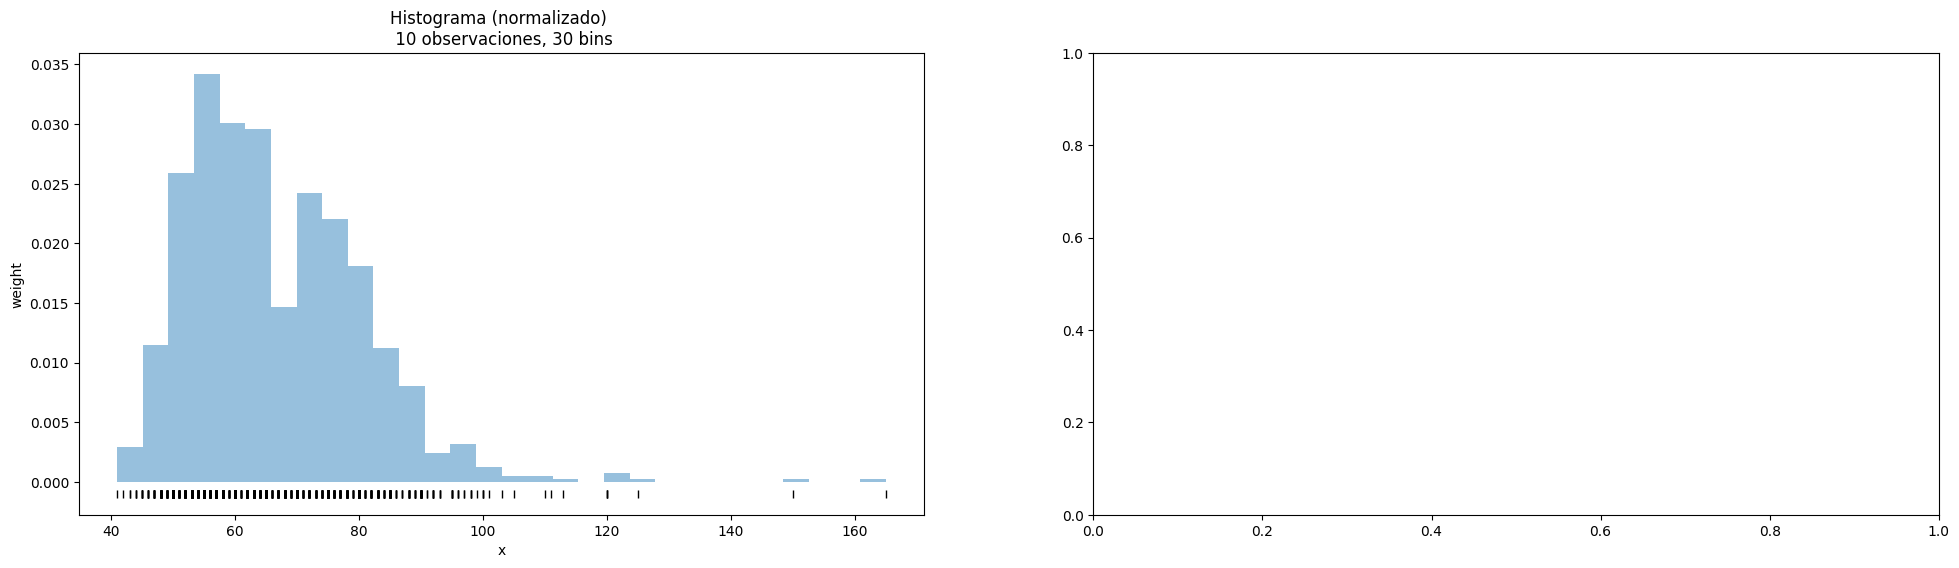

In [ ]:
weight = response_df["Weight"]
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(24,6))
axs[0].hist(weight, bins=30, density=True, color="#3182bd", alpha=0.5)
axs[0].plot(weight, np.full_like(weight, -0.001), '|k', markeredgewidth=1)
axs[0].set_title('Histograma (normalizado) \n 10 observaciones, 30 bins')
axs[0].set_xlabel('x')
axs[0].set_ylabel('weight');
# elegí histograma porque peso requiere un análisis cualitativo de tipo continuo dada la naturaleza del dato

3. Clasifique la distribución del peso según su asimetría, justificando tu respuesta. Incluye el cálculo numérico que lo demuestra.

In [ ]:
print(weight.mean())
print(weight.median())
print(weight.skew())

66.40505050505051
64.0
1.2237251927527477


4. ¿Cuántos valores faltantes tiene la variable `Weight`? ¿Qué porcentaje representa?


In [ ]:
weight.info()
print('\n')
print('Numero de valores faltantes:')
n_MV = weight.isna().sum()
print('{}'.format(n_MV))
print('\n')
print('Representando el ')
weight_count = len(weight)
total = 100 * round (n_MV / weight_count, 2)
print(total, '% del total')


<class 'pandas.core.series.Series'>
RangeIndex: 1010 entries, 0 to 1009
Series name: Weight
Non-Null Count  Dtype  
--------------  -----  
990 non-null    float64
dtypes: float64(1)
memory usage: 8.0 KB


Numero de valores faltantes:
20


Representando el 
2.0 % del total


5. ¿Tendrán los valores faltantes de `Weight` relación con alguna otra variable? Analízalo considerando las siguientes columnas:
*   Numéricas: `Age, Number of siblings`
*   Categóricas: `Gender, Education`

Para ello deberás dividir cada columna en dos grupos: con/sin faltantes en `Weight` y utilizar métodos gráficos y la prueba t para ver si hay diferencias significativas.

**NOTA**. Puedes reutilizar las funciones `Diagnose_MV_Numerical` y `Diagnose_MV_Categorical` definidas en Hands-On-Prep_Missing_Values.zip. Revisa nuevamente cómo utilizarlas.

In [ ]:
from scipy.stats import ttest_ind
def Diagnose_MV_Numerical(response_df,str_att_name,BM_MV):
    MV_labels = {True:'With Missing Values',False:'Without Missing Values'}

    labels=[]
    box_sr = pd.Series('',index = BM_MV.unique())
    for poss in BM_MV.unique():
        BM = BM_MV == poss
        box_sr[poss] = response_df[BM][str_att_name].dropna()
        labels.append(MV_labels[poss])

    plt.boxplot(box_sr,vert=False)
    plt.yticks([1,2],labels)
    plt.xlabel(str_att_name)
    plt.show()

    plt.figure(figsize=(10,4))

    att_range = (response_df[str_att_name].min(),response_df[str_att_name].max())

    for i,poss in enumerate(BM_MV.unique()):
        plt.subplot(1,2,i+1)
        BM = BM_MV == poss
        response_df[BM][str_att_name].hist()
        plt.xlim = att_range
        plt.xlabel(str_att_name)
        plt.title(MV_labels[poss])

    plt.show()

    group_1_data = response_df[BM_MV][str_att_name].dropna()
    group_2_data = response_df[~BM_MV][str_att_name].dropna()

    p_value = ttest_ind(group_1_data,group_2_data).pvalue

    print('p-value of t-test: {}'.format(p_value))

In [ ]:
from scipy.stats import chi2_contingency
def Diagnose_MV_Categorical(df,str_att_name,BM_MV):
    MV_labels = {True:'With Missing Values',False:'Without Missing Values'}

    plt.figure(figsize=(10,4))
    for i,poss in enumerate(BM_MV.unique()):
        plt.subplot(1,2,i+1)
        BM = BM_MV == poss
        response_df[BM][str_att_name].value_counts().plot.bar()
        plt.title(MV_labels[poss])
    plt.show()

    contigency_table = pd.crosstab(BM_MV,response_df[str_att_name])
    p_value = chi2_contingency(contigency_table)[1]

    print('p-value of Chi_squared test: {}'.format(p_value))




Diagnosis Analysis of Missing Values for Age:


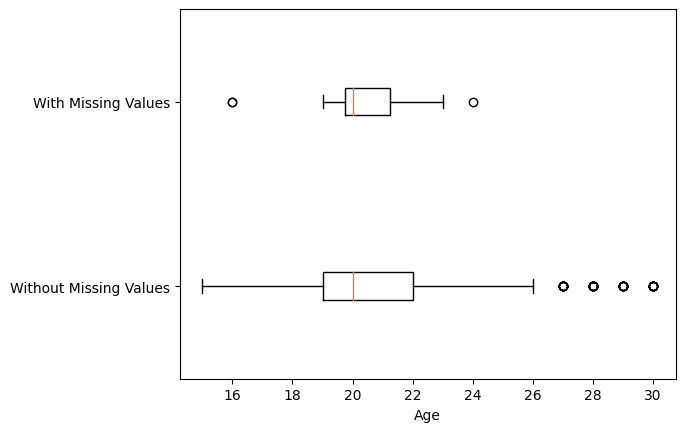

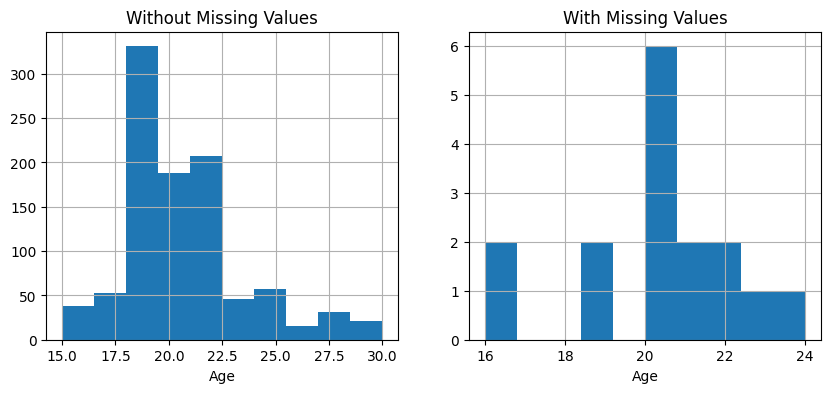

p-value of t-test: 0.7258243979822129
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for Number of siblings:


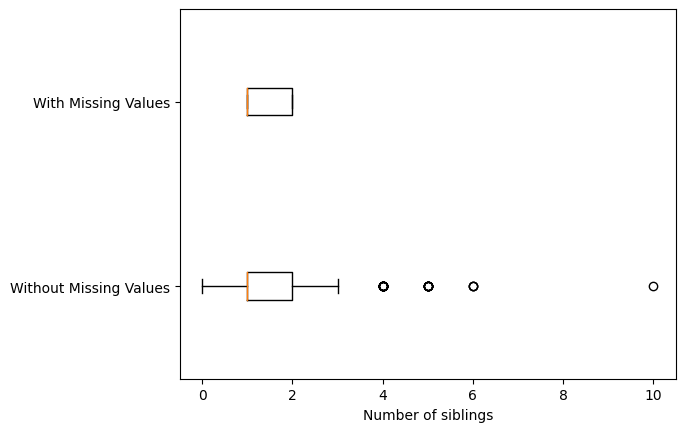

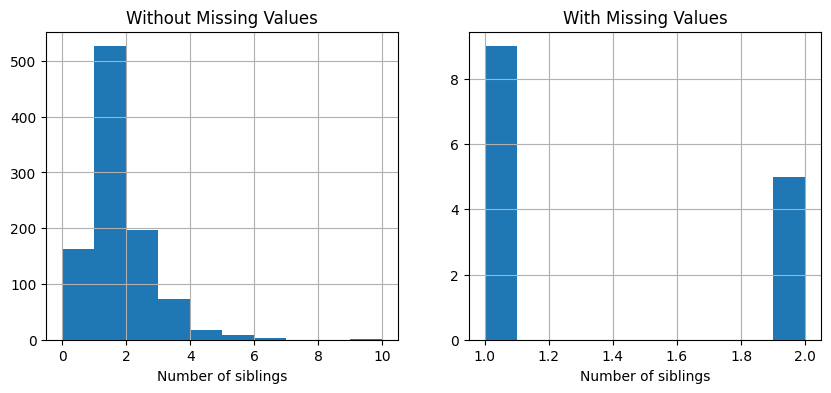

p-value of t-test: 0.8255092107556896
- - - - - - - - - - - - divider - - - - - - - - - - - 
se observa que hay relación con la edad pero no con el número de hermanos
Diagnosis Analysis of Missing Values for Gender:


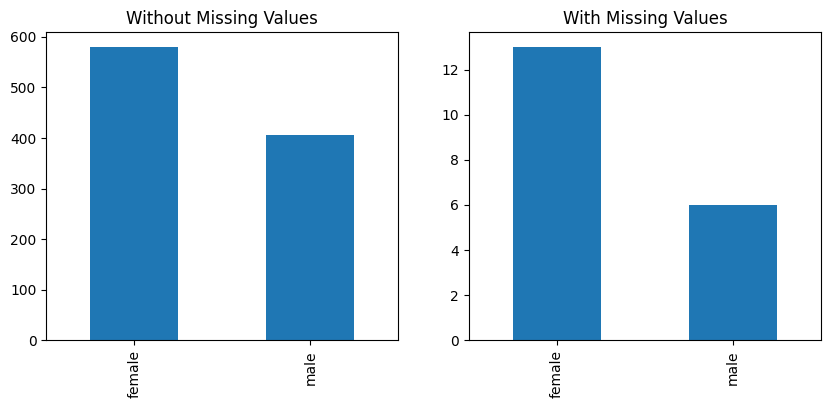

p-value of Chi_squared test: 0.5472167199163878
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for Education:


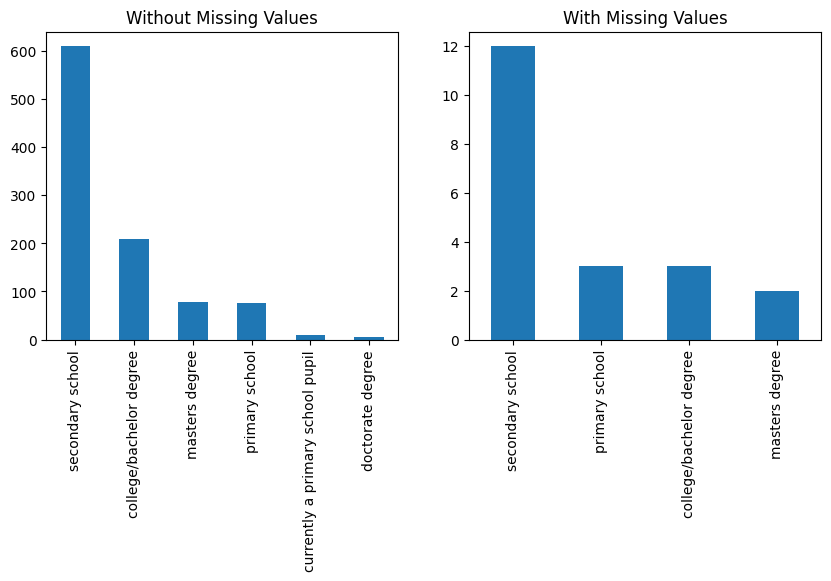

p-value of Chi_squared test: 0.8424822989541867
- - - - - - - - - - - - divider - - - - - - - - - - - 
se observa que no hay mucha relación con la educación ni con el género


In [ ]:
numerical_attributes = ['Age', 'Number of siblings']

BM_MV = response_df.Weight.isna()
for att in numerical_attributes:
    print('Diagnosis Analysis of Missing Values for {}:'.format(att))
    Diagnose_MV_Numerical(response_df,att,BM_MV)
    print('- - - - - - - - - - - - divider - - - - - - - - - - - ')

print('se observa que hay relación con la edad pero no con el número de hermanos')

categorical_attributes = ['Gender', 'Education']

BM_MV = response_df.Weight.isna()
for att in categorical_attributes:
    print('Diagnosis Analysis of Missing Values for {}:'.format(att))
    Diagnose_MV_Categorical(response_df,att,BM_MV)
    print('- - - - - - - - - - - - divider - - - - - - - - - - - ')



print('se observa que no hay mucha relación con la educación ni con el género')



6. Utiliza una medida de tendencia central para imputar los valores faltantes de `Weight`. ¿Cuál es recomendable y por qué?

In [ ]:
response_df['Weight'].fillna(value=response_df['Weight'].mode()[0])
response_df['Weight'].fillna(value=response_df['Weight'].mean())
response_df['Weight'].fillna(value=response_df['Weight'].median())

# se recommienda más la mediana dado el sesgo que tiene la distribución



0       48.0
1       58.0
2       67.0
3       59.0
4       59.0
        ... 
1005    57.0
1006    80.0
1007    75.0
1008    58.0
1009    72.0
Name: Weight, Length: 1010, dtype: float64

7. ¿Hay valores atípicos de la variable `Weight`? Confírmalo con un gráfico de boxplot. ¿Cuántos son? Almacénalos en un dataframe independiente y elimínalos del conjunto original.

25.0
105.0
1001
292    120.0
612    110.0
715    111.0
793    120.0
796    113.0
859    125.0
885    165.0
973    120.0
992    150.0
Name: Weight, dtype: float64


<Axes: xlabel='Weight'>

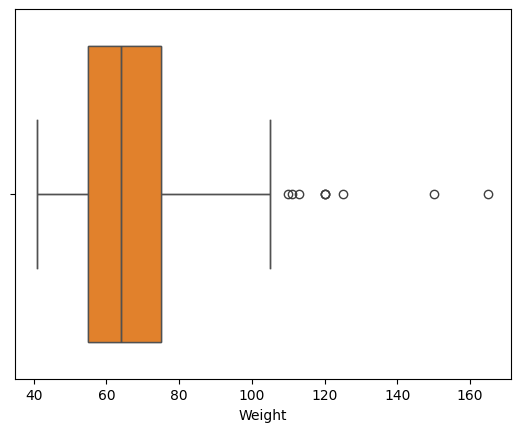

In [ ]:
sns.boxplot(x=response_df['Weight'])
Q1 = response_df['Weight'].quantile(0.25)
Q3 = response_df['Weight'].quantile(0.75)
IQR= Q3 -Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

print(limite_inferior)
print(limite_superior)

outliers_low= (response_df['Weight'] < limite_inferior)
outliers_up= (response_df['Weight'] > limite_superior)

print(len(response_df) - (len(response_df[outliers_low]) + len(response_df[outliers_up])))

print(response_df['Weight'][(outliers_low|outliers_up)])

df= response_df['Weight'][~(outliers_low|outliers_up)]
sns.boxplot(x = df)

8. Repite el mismo proceso de valores atípicos con la variable `Height`.

147.5
199.5
1004
97     200.0
220    200.0
547    203.0
676     62.0
799    203.0
992    200.0
Name: Height, dtype: float64


<Axes: xlabel='Height'>

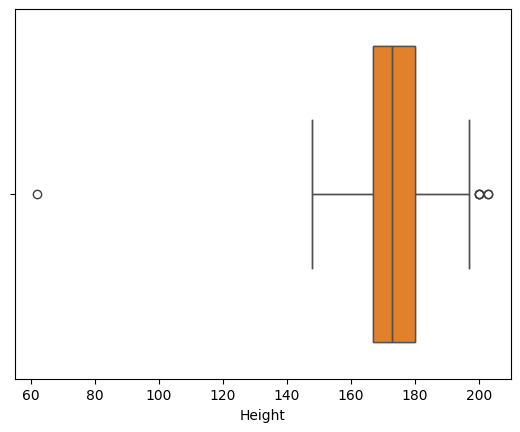

In [ ]:
sns.boxplot(x=response_df['Height'])
Q1 = response_df['Height'].quantile(0.25)
Q3 = response_df['Height'].quantile(0.75)
IQR= Q3 -Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

print(limite_inferior)
print(limite_superior)

outliers_low= (response_df['Height'] < limite_inferior)
outliers_up= (response_df['Height'] > limite_superior)

print(len(response_df) - (len(response_df[outliers_low]) + len(response_df[outliers_up])))

print(response_df['Height'][(outliers_low|outliers_up)])

df_h= response_df['Height'][~(outliers_low|outliers_up)]
sns.boxplot(x = df_h)

9. ¿Hay encuestados que sean atípicos según su índice de masa corporal (`BMI`)? El `BMI` puede ser calculado usando la siguiente fórmula:

`BMI = Weight / Height ^ 2`

**NOTA**. El peso tiene que estar en kilogramos y la altura en metros, pero en el conjunto la altura se ha registrado en centímetros, por lo que deberás convertirla a metros.

10. Utiliza boxplots para visualizar la distribución del `BMI` según cada una de las variables categóricas de texto. Comenta un hallazgo que llame tu atención.